# Booking EDA

### This notebook is dedicated to exploratory data analysis (EDA) of the datasets provided for the Booking.com Kaggle competition.
The goal of the EDA is to understand the structure, quality, and key patterns in the data to inform the feature engineering and modeling steps later.
Through this process, we explore relationships between user reviews, accommodations, and user characteristics, while identifying potential issues such as missing values or data inconsistencies.
The EDA provides the foundation for building an effective ranking model.

#### Installtions and Imports

In [1]:
import sys
print(sys.executable)

/sise/home/hilakese/.conda/envs/booking_kaggel_compatition/bin/python


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter

## Reviews EDA

In [3]:
# Set the base directory manually if needed
base_dir = os.path.dirname(os.getcwd()) # or specify the folder manually
file_path = os.path.join(base_dir, "data", "train_reviews.csv")

if os.path.exists(file_path):
    print(f"Loading file from: {file_path}")
    train_reviews = pd.read_csv(file_path)
    display(train_reviews.head())
else:
    print(f"File not found: {file_path}")


Loading file from: /sise/home/hilakese/reco_system/booking_kaggle_competition/data/train_reviews.csv


,review_id,accommodation_id,review_title,review_positive,review_negative,review_score,review_helpful_votes
0,bf762eec-0e44-42ff-a066-6be55a7d0849,489020669,"Nice &amp; friendly , Plenty of staff around.",Really nice staff. Good food.Fridge with fresh...,woken up 2.30 in the morning by very loud peop...,10.0,0
1,3f1a116f-38ed-4fe8-9086-fd71b0f994f9,1533822482,NaN,The staff was helpful and the room was comfort...,They only placed one wash cloth in the room fo...,9.0,0
2,2cfd21e7-4e2d-4a31-be9d-9e22c705d76d,222537300,NaN,&quot;Home Sweet Home&quot; is a delightful ho...,NaN,10.0,3
3,a240f502-0ee3-47e3-964b-786b56ed5083,644485349,NaN,We havent stayed in a b&amp;b for so many year...,NaN,9.0,0
4,5086e380-21d4-4d5c-be6f-f2d04a57e0ac,-192152850,NaN,Location bed and pillows where so nice,NaN,10.0,0


We loaded the train_reviews.csv file to inspect its structure.
It contains review details like IDs, scores, and text fields. Some columns, like review_title and review_negative, have missing values to address later

In [4]:
# Basic information
display(train_reviews.info())  # Column data types and non-null counts

# Summary statistics for numerical columns
display(train_reviews.describe())

# Check for missing values
missing_values = train_reviews.isnull().sum()
print("Missing values:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628989 entries, 0 to 1628988
Data columns (total 7 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   review_id             1628989 non-null  object 
 1   accommodation_id      1628989 non-null  int64  
 2   review_title          1097128 non-null  object 
 3   review_positive       1628981 non-null  object 
 4   review_negative       1159440 non-null  object 
 5   review_score          1628989 non-null  float64
 6   review_helpful_votes  1628989 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 87.0+ MB


None

,accommodation_id,review_score,review_helpful_votes
count,1.628989e+06,1.628989e+06,1.628989e+06
mean,3.079934e+06,8.871634e+00,1.217989e-01
std,1.235929e+09,1.166345e+00,5.082283e-01
min,-2.147447e+09,1.000000e+00,0.000000e+00
25%,-1.056474e+09,8.000000e+00,0.000000e+00
50%,-3.509157e+06,9.000000e+00,0.000000e+00
75%,1.076218e+09,1.000000e+01,0.000000e+00
max,2.147458e+09,1.000000e+01,9.100000e+01


Missing values:
 review_id                    0
accommodation_id             0
review_title            531861
review_positive              8
review_negative         469549
review_score                 0
review_helpful_votes         0
dtype: int64


In [5]:
# Fill missing values for text fields
train_reviews['review_title'].fillna("No Title", inplace=True)
train_reviews['review_positive'].fillna("No Positive Review", inplace=True)
train_reviews['review_negative'].fillna("No Negative Review", inplace=True)

# Drop rows with missing `review_score` if it’s critical
train_reviews.dropna(subset=['review_score'], inplace=True)

# Verify changes
print(train_reviews.isnull().sum())

/tmp/ipykernel_2528272/153131739.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_reviews['review_title'].fillna("No Title", inplace=True)
/tmp/ipykernel_2528272/153131739.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

review_id               0
accommodation_id        0
review_title            0
review_positive         0
review_negative         0
review_score            0
review_helpful_votes    0
dtype: int64


In this step, we examined the overall structure, summary statistics, and missing values in the train_reviews dataset.
The dataset contains columns for review details like score, helpful votes, and text.
Key observations include missing values in review_title (32.7%), review_positive (1), and review_negative (28.8%).
Numeric columns, such as review_score and review_helpful_votes, appear complete.
This analysis highlights the need for handling missing values and potential outliers before modeling.

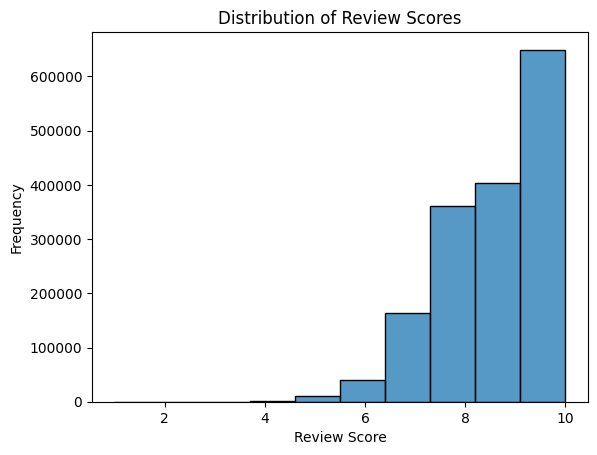

In [6]:
# Distribution of review scores
sns.histplot(train_reviews['review_score'], kde=False, bins=10)
plt.title("Distribution of Review Scores")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()

This visualization shows the distribution of review scores in the dataset.
We observe a strong skew towards higher scores, with the majority of reviews receiving scores of 8 or above.
This suggests a bias towards positive feedback, which could influence the model's ability to differentiate between reviews.
Handling this imbalance may be necessary in later stages of analysis or modeling.

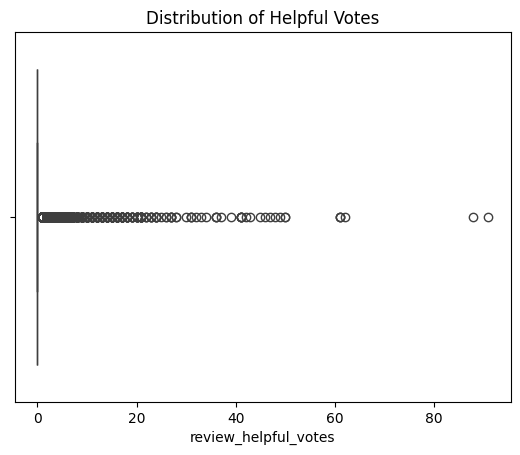

,review_id,accommodation_id,review_title,review_positive,review_negative,review_score,review_helpful_votes
40413,e99671ef-5091-4e54-8700-a6e4d66e1c11,321160175,Very comfortable.,"The location was good, the room is cleaned eve...",Need to have more selection of juice drinks av...,9.0,91
680897,6e6279a8-a41e-43f7-8046-17e58b7f9ac1,321160175,No Title,"nice staff ( especially Youssra and Marwa) , c...",No Negative Review,9.0,88
77816,3dcb36bc-a09b-4aac-8ec9-d7ad46732bec,-1879783390,No Title,Everything was great! The apartment (on 2 floo...,-,10.0,62
315016,7ce7ea83-f335-4432-b67b-25b82a9aa195,-1879783390,No Title,hi travelers I highly recommend this apartme...,No Negative Review,10.0,61
636943,8a1fdb1a-b6f9-417c-a993-6d1282e553dc,-1879783390,The most perfect spot in Bologna.,"Our host was most wonderfull, she gave us a wa...",No Negative Review,9.0,61


In [7]:
# Plot helpful votes
sns.boxplot(x=train_reviews['review_helpful_votes'])
plt.title("Distribution of Helpful Votes")
plt.show()

# Top helpful reviews
display(train_reviews.sort_values(by='review_helpful_votes', ascending=False).head())

This analysis focuses on reviews with the highest helpful votes, as seen in the table and corresponding box plot.
The majority of reviews have zero or very few helpful votes, while a small subset—represented by outliers—received significantly higher counts (e.g., 91 votes).
These highly helpful reviews often feature detailed positive feedback and high scores (9 or 10), with occasional constructive negative comments.
Understanding the characteristics of these outliers can help refine the ranking model by emphasizing factors that make reviews useful to users.

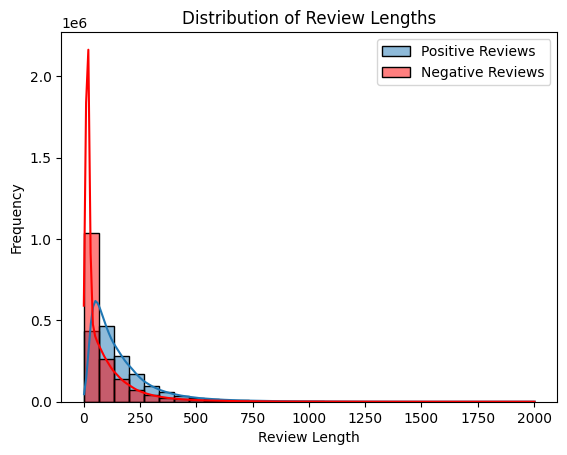

In [8]:
# Add a column for review text length
train_reviews['positive_review_length'] = train_reviews['review_positive'].apply(len)
train_reviews['negative_review_length'] = train_reviews['review_negative'].apply(len)

# Plot the distribution of review lengths
sns.histplot(train_reviews['positive_review_length'], bins=30, kde=True, label="Positive Reviews")
sns.histplot(train_reviews['negative_review_length'], bins=30, kde=True, color='red', label="Negative Reviews")
plt.legend()
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.show()

This plot visualizes the distribution of review lengths for positive and negative reviews.
The x-axis represents the length of the review text, while the y-axis shows the frequency.
Most reviews are relatively short, with a steep drop-off after 250 characters.
Positive and negative reviews follow similar patterns, though negative reviews tend to be slightly shorter on average.
This information can help us understand user behavior and the importance of review length in the ranking model.

In [9]:
review_positive_text = " ".join(review.lower() for review in train_reviews['review_positive'] if isinstance(review, str))
review_negative_text = " ".join(review.lower() for review in train_reviews['review_negative'] if isinstance(review, str))

review_positive_words = review_positive_text.split()
review_negative_words = review_negative_text.split()

review_positive_word_counts = Counter(review_positive_words)
review_negative_word_counts = Counter(review_negative_words)

review_positive_word_counts_df = pd.DataFrame(review_positive_word_counts.items(),
                                              columns=['word', 'count']).sort_values(by='count', ascending=False)
review_negative_word_counts_df = pd.DataFrame(review_negative_word_counts.items(),
                                              columns=['word', 'count']).sort_values(by='count', ascending=False)

print("The 20 most used words in positive reviews:")
display(review_positive_word_counts_df.head(20))

print("The 20 most used words in negative reviews:")
display(review_negative_word_counts_df.head(20))

The 20 most used words in positive reviews:


,word,count
19,the,3039935
23,and,2479139
21,was,1417499
36,to,1114528
30,a,1052855
153,very,887776
29,is,657452
126,in,598937
9,of,579944
11,for,526167


The 20 most used words in negative reviews:


,word,count
4,the,1574721
46,a,677423
77,to,662849
30,was,660549
33,no,658170
76,and,579505
34,negative,475622
35,review,470213
3,in,420892
66,of,322154


After converting all text to lowercase, this analysis reveals the most frequently used words in positive and negative reviews.
Common stopwords like 'the,' 'and,' and 'was' dominate both lists, highlighting the need for further filtering to focus on meaningful terms.
In positive reviews, words like 'room,' 'location,' 'staff,' and 'clean' emphasize satisfaction with accommodations.
In negative reviews, terms like 'room,' 'not,' 'negative,' and 'review' point to common sources of dissatisfaction.
This step lays the groundwork for deeper insights by refining the word analysis to exclude stopwords and placeholders.

In [10]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

filtered_positive_words = [word for word in review_positive_words if word.lower() not in stop_words]
filtered_negative_words = [word for word in review_negative_words if word.lower() not in stop_words]

positive_filtered_word_counts = Counter(filtered_positive_words)
negative_filtered_word_counts = Counter(filtered_negative_words)

positive_filtered_word_counts_df = pd.DataFrame(positive_filtered_word_counts.items(),
                         columns=['word', 'count']).sort_values(by='count', ascending=False)
negative_filtered_word_counts_df = pd.DataFrame(negative_filtered_word_counts.items(),
                                                columns=['word', 'count']).sort_values(by='count', ascending=False)

print("The 20 most used words in positive reviews: - no stopwords")
display(positive_filtered_word_counts_df.head(20))

print("The 20 most used words in negative reviews: - no stopwords")
display(negative_filtered_word_counts_df.head(20))

ModuleNotFoundError: No module named 'nltk'

After removing stopwords, this analysis highlights the most meaningful words in positive and negative reviews.
In positive reviews, frequent words like 'room,' 'location,' 'staff,' 'great,' and 'clean' emphasize satisfaction with accommodations and services.
Words such as 'breakfast,' 'comfortable,' and 'friendly' reflect key aspects that users value.
In negative reviews, terms like 'room,' 'negative,' 'review,' 'nothing,' and 'small' indicate common sources of dissatisfaction, often tied to room quality or unmet expectations.
Interestingly, words like 'breakfast' and 'hotel' appear in both lists, highlighting their importance to users across sentiments.
This filtered analysis sharpens our understanding of user feedback themes and provides a foundation for further modeling.

## Users EDA

In [ ]:
# Set the base directory manually if needed
base_dir = os.path.dirname(os.getcwd()) # or specify the folder manually
file_path = os.path.join(base_dir, "data", "train_users.csv")

if os.path.exists(file_path):
    print(f"Loading file from: {file_path}")
    train_users = pd.read_csv(file_path)
    display(train_users.head())
else:
    print(f"File not found: {file_path}")

In this step, we loaded the train_users.csv file, which contains user and accommodation-related information.
Each row represents a user-accommodation pair and includes details such as the type of guest (guest_type), the user's country, number of nights stayed (room_nights), and the month of the visit.
Accommodation attributes like type (accommodation_type), country, score, star rating, and location characteristics (e.g., ski, beach, or city center proximity) are also provided.
This dataset allows us to explore how user preferences and accommodation features relate to reviews and rankings.

In [ ]:
# Basic information
display(train_users.info())  # Column data types and non-null counts

# Summary statistics for numerical columns
print(train_users.describe())

# Check for missing values
missing_values = train_users.isnull().sum()
print("Missing values:\n", missing_values)

In [ ]:
# Fill missing values for text fields
train_users['guest_country'].fillna("Unknown", inplace=True)

# Normalize all long staying to 30 days max
train_users['room_nights'] = train_users['room_nights'].apply(lambda x: min(x, 30))

# Verify changes
print(train_users.isnull().sum())

We analyzed the train_users.csv dataset, which has 13 columns.
Only guest_country has 136 missing values.
Numerical columns like room_nights show extreme outliers (e.g., 72 nights).
Binary location columns (e.g., location_is_ski) indicate these features apply to a small subset.
This summary helps identify potential outliers and relationships to explore further.

## Match EDA

In [ ]:
# Define data types for columns
dtypes = {
    'user_id': 'object',  # Strings can stay as objects
    'accommodation_id': 'int32',  # Reduce from int64 to int32
    'review_id': 'object',  # Strings
}

# Load the datasets with defined dtypes
matches = pd.read_csv("../data/train_matches.csv", dtype=dtypes)
users = pd.read_csv("../data/train_users.csv", dtype=dtypes)
reviews = pd.read_csv("../data/train_reviews.csv", dtype=dtypes)


In [ ]:
print(f"Number of matches: {len(matches)}")

# Merge matches with users on user_id
matches_with_users = matches.merge(users, on=['user_id', 'accommodation_id'], how='left', indicator=True)

# Check for matches without corresponding users
missing_users = matches_with_users[matches_with_users['_merge'] == 'left_only']
print(f"Number of matches without corresponding users: {len(missing_users)}")

# Merge matches with reviews on review_id and accommodation_id
matches_with_reviews = matches.merge(reviews, on=['review_id', 'accommodation_id'], how='left', indicator=True)

# Check for matches without corresponding reviews
missing_reviews = matches_with_reviews[matches_with_reviews['_merge'] == 'left_only']
print(f"Number of matches without corresponding reviews: {len(missing_reviews)}")

# Final check: Matches present in both users and reviews
valid_matches = matches_with_users[matches_with_users['_merge'] == 'both'].merge(
    matches_with_reviews[matches_with_reviews['_merge'] == 'both'], on=['review_id', 'accommodation_id'], how='inner'
)

print(f"Number of valid matches: {len(valid_matches)}")

We validated the matches dataset against users and reviews: all 1,628,989 matches have corresponding entries in both datasets, with no missing users or reviews.
This confirms the data's completeness and consistency.

In [ ]:
# Define sample size
sample_size = 100000  # Adjust based on memory constraints

# Sample each DataFrame
users_sample = users.sample(n=min(sample_size, len(users)), random_state=42)
reviews_sample = reviews.sample(n=min(sample_size, len(reviews)), random_state=42)

# Check the sizes of the sampled datasets
print(f"Sampled users: {len(users_sample)}")
print(f"Sampled reviews: {len(reviews_sample)}")

In [ ]:
# Sample only accommodation_ids present in matches
users_sample = users[users['accommodation_id'].isin(matches['accommodation_id'])].sample(n=100000, random_state=42)
reviews_sample = reviews[reviews['accommodation_id'].isin(matches['accommodation_id'])].sample(n=100000, random_state=42)

In [ ]:
# Merge matches with sampled users on accommodation_id
matches_with_users = matches.merge(users_sample, on=['accommodation_id'], how='left', indicator=True)

# Identify matches without corresponding users
missing_users = matches_with_users[matches_with_users['_merge'] == 'left_only']
print(f"Number of matches without corresponding users in sampled data: {len(missing_users)}")

# Merge matches with sampled reviews on accommodation_id
matches_with_reviews = matches.merge(reviews_sample, on=['accommodation_id'], how='left', indicator=True)

# Identify matches without corresponding reviews
missing_reviews = matches_with_reviews[matches_with_reviews['_merge'] == 'left_only']
print(f"Number of matches without corresponding reviews in sampled data: {len(missing_reviews)}")

In [ ]:
# Create synthetic reviews for missing matches
if len(missing_reviews) > 0:
    missing_reviews['review_id'] = [f"synthetic_{i}" for i in range(len(missing_reviews))]
    missing_reviews['review_title'] = "Synthetic Review"
    missing_reviews['review_positive'] = "No positive review available"
    missing_reviews['review_negative'] = "No negative review available"
    missing_reviews['review_score'] = 0.0
    missing_reviews['review_helpful_votes'] = 0

    # Save synthetic reviews to a CSV file
    missing_reviews[['review_id', 'accommodation_id', 'review_title',
                     'review_positive', 'review_negative',
                     'review_score', 'review_helpful_votes']].to_csv("../data/synthetic_reviews_sample.csv", index=False)

    print(f"Number of synthetic reviews created for sampled data: {len(missing_reviews)}")
else:
    print("All sampled accommodations have corresponding reviews.")